In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fluo = pd.read_csv('/home/shashank/Desktop/peduncle_0hr/total_fluo_peduncle_0hour_40x_4fps_ex3.csv')
# fluo = pd.read_csv('/home/shashank/Desktop/ouput/hyp')
length = pd.read_csv('/home/shashank/Desktop/peduncle_0hr/lengths_peduncle_0hour_40x_4fps_ex3_002.csv')

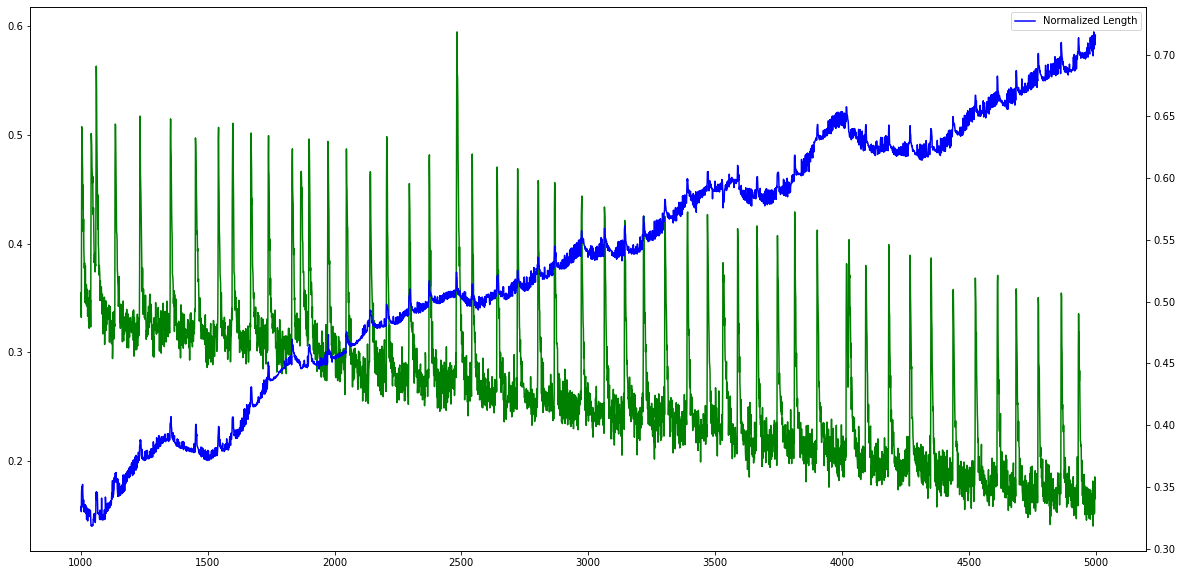

In [3]:
norm_fluo = (fluo-np.min(fluo))/(np.max(fluo) - np.min(fluo))
norm_length = (length-np.min(length))/(np.max(length) - np.min(length))

# print(np.max(norm_fluo))
# print(np.min(norm_fluo))
# print(np.max(norm_length))
# print(np.min(norm_length))
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
# plt.figure(figsize=(20,10))
ax1.plot(norm_fluo[1000:5000],'g',label="Normalized Fluorescence")
ax2.plot(norm_length[1000:5000], 'b', label="Normalized Length")
plt.legend()
plt.xlabel('Time[s]')
plt.show()

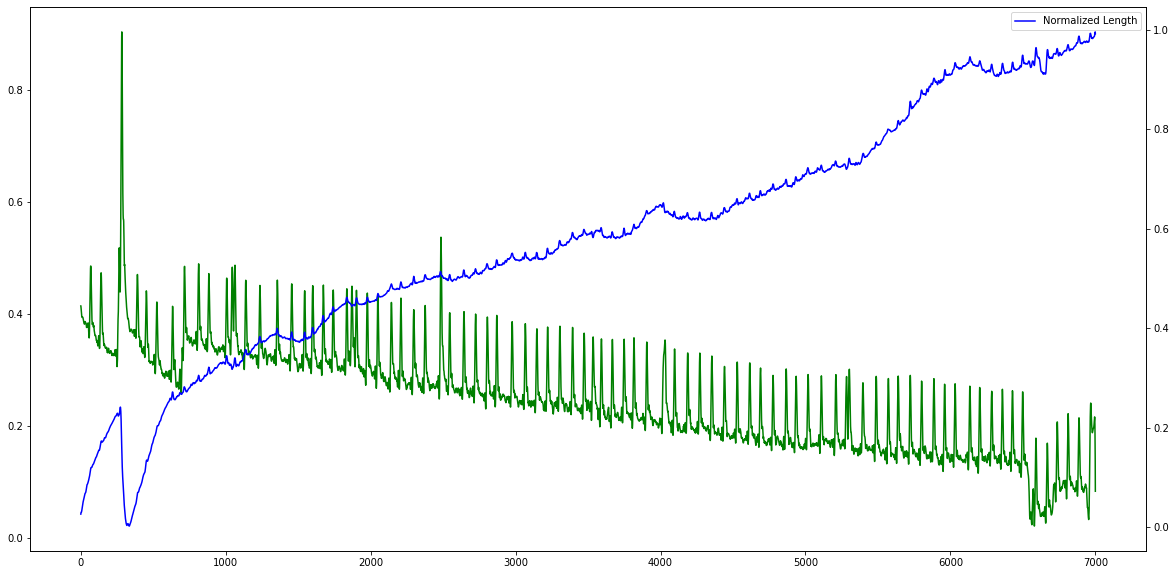

In [4]:
from scipy.signal import savgol_filter
norm_fluo_smooth = savgol_filter(np.reshape(norm_fluo.values, -1), 51, 10)
norm_length_smooth = savgol_filter(np.reshape(norm_length.values, -1), 51, 10)

# norm_fluo_smooth = np.reshape(norm_fluo.values, -1)
# norm_length_smooth = np.reshape(norm_length.values, -1)
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot( norm_fluo_smooth,'g',label="Normalized Fluorescence")
ax2.plot( norm_length_smooth, 'b', label="Normalized Length")
plt.legend()
plt.xlabel('Time[s]')
plt.show()

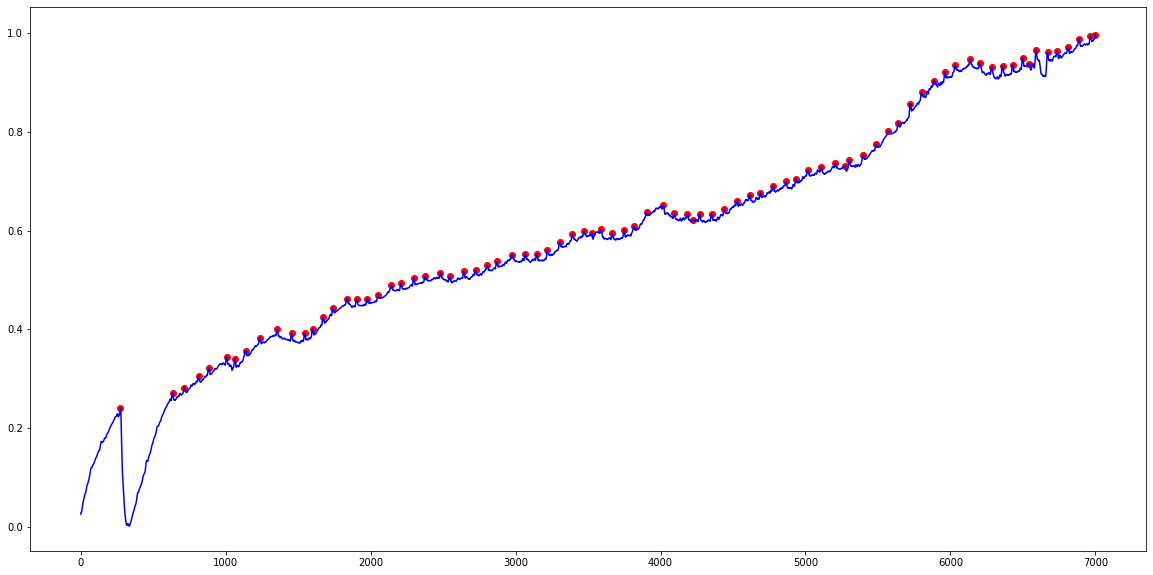

In [5]:
from scipy.signal import argrelextrema
lid = argrelextrema(norm_length_smooth, np.greater, order=25)
fid = argrelextrema(norm_fluo_smooth, np.greater, order=25)
plt.figure(figsize=(20,10))
# plt.scatter(fid, norm_fluo_smooth[fid], color='k')
plt.scatter(lid, norm_length_smooth[lid], color ='r')
plt.plot(norm_length_smooth, 'b', label="Normalized Length")
# plt.plot( norm_fluo_smooth[3000:4000],'g',label="Normalized Fluorescence")

In [9]:
fpk = []
for i in lid[0]:
    fpk.append(i-25 + np.argmax( norm_fluo_smooth[ i-25 : i+25 ] ) )

In [11]:
onfpk = []
for x in fpk:
    while(norm_fluo_smooth[x] > norm_fluo_smooth[x-1]):
        x-=1
    onfpk.append(x)
onel = []
for x in lid[0]:
    while norm_length_smooth[x] > norm_length_smooth[x-1]:
        x = x-1
    onel.append(x)

In [14]:
%matplotlib qt
plt.scatter(onel, norm_length_smooth[onel], color='r')
plt.scatter(onfpk, norm_fluo_smooth[onfpk], color='k')
plt.plot(norm_fluo_smooth)
plt.plot(norm_length_smooth)
plt.scatter(fpk, norm_fluo_smooth[fpk], color='k')
plt.scatter(lid, norm_length_smooth[lid], color='r')